In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import pandas as pd
from utility.graph_utility import GraphUtility

# [[freq, logmag, mag], [freq, logmag, phse], ・・・]

In [18]:
# 1folder
folder = "pump_20221014_171009_40dB_-0.1--0.15V_8.5-11.0"
filename = "pump2020221014_171009_40dB_-0.1V.csv"
file_day = "pump2020221014_171009_40dB_"
csvname = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename

df = pd.read_csv(csvname, sep=',',header=None, usecols=[0,1,2,3,4,5])
all_freq = df.iloc[17:,1]
freq_start = all_freq.head(1)
freq_end = all_freq.tail(1)
print(all_freq, freq_start, freq_end)

# dB = 5
dB = float(df.iat[0, 5])
print(dB)
minV = float(df.iat[1,5])
maxV = float(df.iat[2,5])
numV = int(df.iat[3,5])
# maxV = 5.125
# numV = 6
v0 = np.linspace(minV, maxV, numV)

if v0[1] > 0:
    v = v0
else:
    v = np.flip(v0)

print(minV, maxV, v)


17       8.500000000
18       8.501250000
19       8.502500000
20       8.503750000
21       8.505000000
            ...     
2013    10.995000000
2014    10.996250000
2015    10.997500000
2016    10.998750000
2017    11.000000000
Name: 1, Length: 2001, dtype: object 17    8.500000000
Name: 1, dtype: object 2017    11.000000000
Name: 1, dtype: object
40.0
-0.1 -0.15 [-0.15       -0.14791667 -0.14583333 -0.14375    -0.14166667 -0.13958333
 -0.1375     -0.13541667 -0.13333333 -0.13125    -0.12916667 -0.12708333
 -0.125      -0.12291667 -0.12083333 -0.11875    -0.11666667 -0.11458333
 -0.1125     -0.11041667 -0.10833333 -0.10625    -0.10416667 -0.10208333
 -0.1       ]


In [19]:
mag = {}
# diff = {}
for m,n in enumerate(v):
    # print(m,n)
    filename = file_day + str(n) + "V.csv"
    csvname1 = "H:/マイドライブ/RyoyaOhashi/JPA_tools/JPA_Result/csv/" + folder + "/" + filename
    
    mag[n] = np.loadtxt(csvname1, skiprows=17, usecols=[2], delimiter=',', unpack=True)

print(mag[-0.15])

[-58.9 -58.9 -59.  ... -62.4 -62.3 -62.3]


In [20]:
v_array = np.array(v)
print(v_array.dtype)
freq_array =  np.loadtxt(csvname, skiprows=17, usecols=[1], delimiter=',', unpack=True)
# freq_array = np.array(freq_array, dtype=float)
print(freq_array)

float64
[ 8.5      8.50125  8.5025  ... 10.9975  10.99875 11.     ]


[[-58.9     -58.94134 -58.87528 ... -58.83262 -58.9     -58.9153 ]
 [-58.9     -58.90571 -58.90871 ... -58.87909 -58.9     -58.88966]
 [-59.      -58.95723 -58.97545 ... -58.88475 -59.      -58.994  ]
 ...
 [-62.4     -62.36639 -62.37101 ... -63.93327 -63.3     -62.3462 ]
 [-62.3     -62.32445 -62.32445 ... -64.44426 -63.3     -62.32369]
 [-62.3     -62.29375 -62.30841 ... -64.12238 -63.5     -62.30203]]


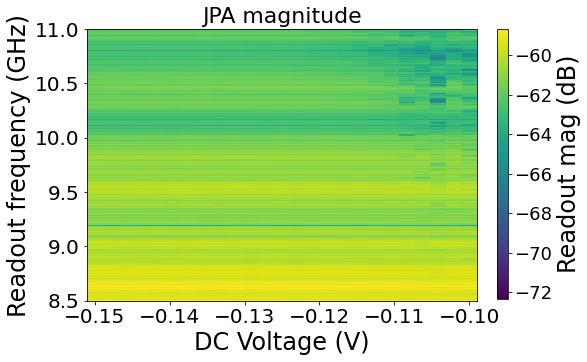

In [21]:
#　振幅評価
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
# print(X,Y)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    # print(i)
    Z[i] = mag[x[i]]
    # print(Z[i])
Z_T = Z.transpose()
print(Z_T)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T, shading="auto" )
# hoge00.set_clim(-70, -50)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax)
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA magnitude", size=22)
ax.set_xlabel('DC Voltage (V)', size=24)
ax.set_ylabel('Readout frequency (GHz)', size=24)
cbar.set_label("Readout mag (dB)", size=24) #カラーバーのラベル
plt.tick_params(labelsize=18)

plt.show()
del plt


d(theta)/d(current) obtained through the numerical derivation using gauss convolution

In [22]:
diff = {}
for i,m in enumerate(v):
    diff[m] = abs(mag[v[i]] - mag[v[i-1]])
    # print(i)
    for l in range(len(diff[m])):
        # print((diff[i])[l])
        if (diff[m])[l] > 180:
            (diff[m])[l] = 360 - (diff[m])[l]
    diff[m] = diff[m]
    
print(diff)

{-0.15: array([0.0153 , 0.01034, 0.006  , ..., 0.0538 , 0.02369, 0.00203]), -0.14791666666666667: array([0.04134, 0.00571, 0.04277, ..., 0.03361, 0.02445, 0.00625]), -0.14583333333333331: array([0.06606, 0.003  , 0.01822, ..., 0.00462, 0.     , 0.01466]), -0.14375: array([0.06497, 0.00867, 0.12112, ..., 0.02504, 0.0259 , 0.02464]), -0.14166666666666666: array([0.04666, 0.01185, 0.10151, ..., 0.00959, 0.00252, 0.04779]), -0.13958333333333334: array([0.00304, 0.03991, 0.05264, ..., 0.01587, 0.02241, 0.00055]), -0.1375: array([0.02279, 0.01252, 0.00939, ..., 0.00866, 0.033  , 0.0089 ]), -0.13541666666666666: array([0.05485, 0.09246, 0.06406, ..., 0.01523, 0.02018, 0.03255]), -0.13333333333333333: array([0.02822, 0.00467, 0.07429, ..., 0.06759, 0.08348, 0.0552 ]), -0.13125: array([0.01507, 0.02286, 0.01685, ..., 0.0124 , 0.02145, 0.02326]), -0.12916666666666665: array([0.01234, 0.06543, 0.02854, ..., 0.01314, 0.00803, 0.0243 ]), -0.12708333333333333: array([0.01477, 0.04375, 0.00587, ..., 

(2001, 25) (2001, 25)
(2001, 25)


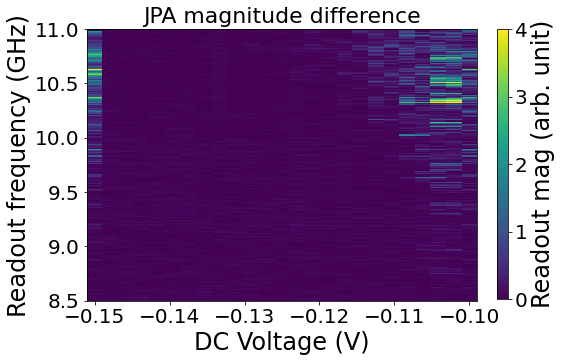

In [26]:
# 差分評価(微分)
import matplotlib.pyplot as plt
from numpy import size
plt.rcParams["font.size"] = 20
x = v
y = freq_array


X, Y = np.meshgrid(x, y)
print(X.shape,Y.shape)
Z = np.zeros((len(x), len(y)))
for i in range(len(x)):
    Z[i] = diff[x[i]]
Z_T = Z.transpose()
print(Z_T.shape)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

hoge00 = ax.pcolormesh(X, Y, Z_T,shading="auto")
hoge00.set_clim(0, 4)
cax = plt.axes([0.94, 0.13, 0.02, 0.75]) #[左端からの距離, 下端からの距離, 太さ, 長さ]
cbar = plt.colorbar(hoge00, cax=cax)
# cbar = plt.colorbar(hoge00, cax=cax, ticks=[-180, -90, 0, 90, 180])
# cbar = fig.colorbar(ticks=[-180, -90, 0, 90, 180])

ax.set_title("JPA magnitude difference", size=22)
ax.set_xlabel('DC Voltage (V)', size = 24)
ax.set_ylabel('Readout frequency (GHz)', size = 24)
cbar.set_label("Readout mag (arb. unit)", size = 24) #カラーバーのラベル


plt.show()
del plt
